# とりえあずデータみてみる

In [11]:
import pandas as pd

In [311]:
df = pd.read_csv("./data/bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv")

In [315]:
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1325318220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1325318280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1325318340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1325318400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1325318460,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# グラフをみる

In [157]:
from datetime import datetime
df["Timestamp_UTC"] = df["Timestamp"].apply(lambda x: datetime.utcfromtimestamp(x))
df = df.set_index("Timestamp_UTC")

In [158]:
df = df.rename(columns={
    "Open": "open",
    "High": "high",
    "Low": "low",
    "Close": "close",
    "Volume_(BTC)": "volume"
})

In [159]:
import cufflinks as cf
cf.set_config_file(offline=True)
red = cf.get_scales("dflt")[4]
green = cf.get_scales("dflt")[2]

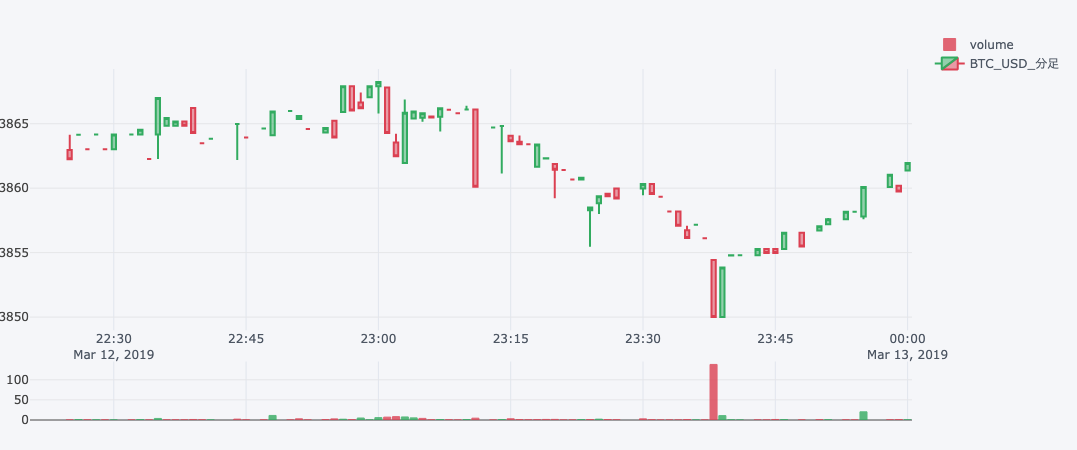

In [160]:
qf = cf.QuantFig(df.tail(100))
qf.add_volume()
qf.iplot(up_color=green, down_color=red, name="BTC_USD_分足")

# １分毎は多すぎるので1日毎にする

In [309]:
how = {
    "open": "first",
    "high": "max",
    "low": "min",
    "close": "last",
    "volume": "sum"
}
df_day = df.resample('D').agg(how)
df_day.head()

,open,high,low,close,volume
Timestamp_UTC,,,,,
2011-12-31,4.39,4.58,4.39,4.58,95.317878
2012-01-01,4.58,5.00,4.58,5.00,21.602000
2012-01-02,5.00,5.00,5.00,5.00,19.048000
2012-01-03,5.32,5.32,5.14,5.29,88.037281
2012-01-04,4.93,5.57,4.93,5.57,107.233260


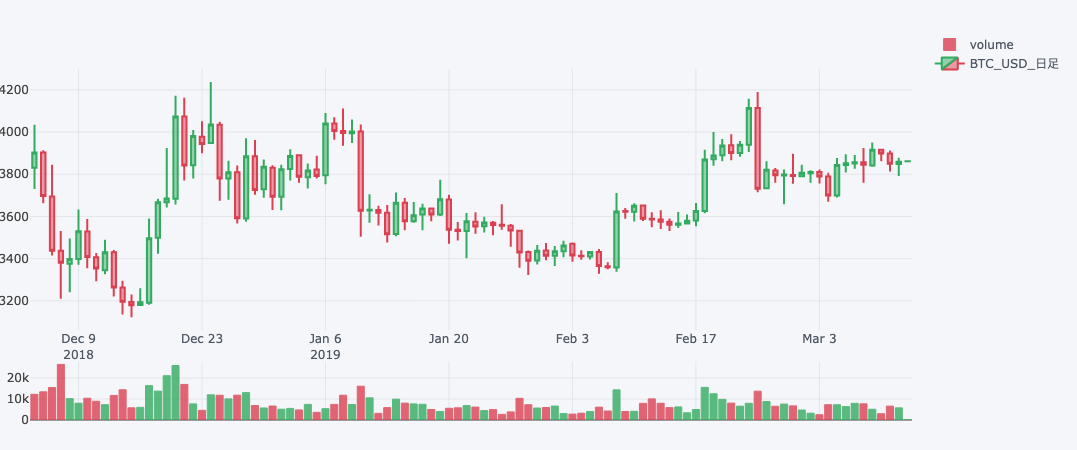

In [162]:
qf = cf.QuantFig(df_day.tail(100))
qf.add_volume()
qf.iplot(up_color=green, down_color=red, name="BTC_USD_日足")

# 日経平均株価

In [185]:
n255 = pd.read_csv("./data/N225.csv")
n255["Timestamp_UTC"] = n255["Date"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
n255 = n255.set_index("Timestamp_UTC")
n255 = n255.rename(columns={
    "Open": "open",
    "High": "high",
    "Low": "low",
    "Close": "close",
    "Volume": "volume"
})


In [322]:
n255.head()

,Date,open,high,low,close,Adj Close,volume
Timestamp_UTC,,,,,,,
2012-01-04,2012-01-04,8549.540039,8581.450195,8547.700195,8560.110352,8560.110352,106000.0
2012-01-05,2012-01-05,8515.660156,8519.160156,8481.830078,8488.709961,8488.709961,77700.0
2012-01-06,2012-01-06,8488.980469,8488.980469,8349.330078,8390.349609,8390.349609,101300.0
2012-01-10,2012-01-10,8422.990234,8450.589844,8405.179688,8422.259766,8422.259766,112300.0
2012-01-11,2012-01-11,8440.959961,8463.719727,8426.030273,8447.879883,8447.879883,106200.0


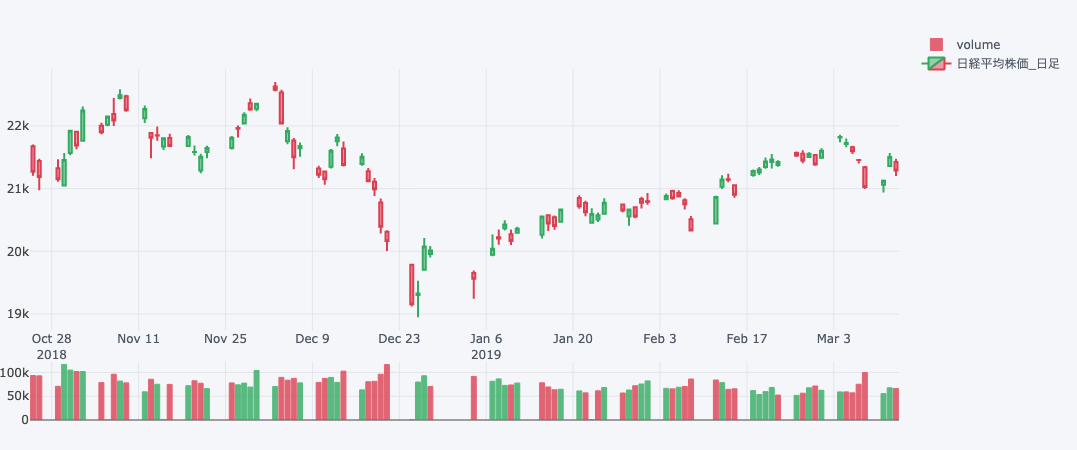

In [187]:
qf = cf.QuantFig(n255.tail(100))
qf.add_volume()
qf.iplot(up_color=green, down_color=red, name="日経平均株価_日足")

# 日経平均株価とBTCの相関をみる

## 欠損値を捨てる

In [307]:
XY = pd.merge(n255, df_day, on="Timestamp_UTC", how="inner")
XY = XY.drop(columns="Date")
XY = XY.dropna()
XY.head()

,open_x,high_x,low_x,close_x,Adj Close,volume_x,open_y,high_y,low_y,close_y,volume_y
Timestamp_UTC,,,,,,,,,,,
2012-01-04,8549.540039,8581.450195,8547.700195,8560.110352,8560.110352,106000.0,4.93,5.57,4.93,5.57,107.233260
2012-01-05,8515.660156,8519.160156,8481.830078,8488.709961,8488.709961,77700.0,5.72,6.65,5.72,6.65,94.801829
2012-01-06,8488.980469,8488.980469,8349.330078,8390.349609,8390.349609,101300.0,6.65,6.90,6.00,6.00,33.882747
2012-01-10,8422.990234,8450.589844,8405.179688,8422.259766,8422.259766,112300.0,6.24,7.14,6.24,7.14,62.289980
2012-01-11,8440.959961,8463.719727,8426.030273,8447.879883,8447.879883,106200.0,7.14,7.33,6.25,7.00,105.358934


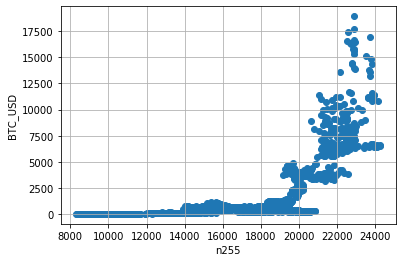

In [429]:
import matplotlib.pyplot as plt
X = XY["close_x"].to_frame()
Y = XY["close_y"].to_frame()
plt.scatter(X, Y)
plt.xlabel("n255")
plt.ylabel("BTC_USD")
plt.grid()
plt.show()

# 線形回帰する

[[0.26696078]]
[-3263.87771254]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
-2.776608128480641


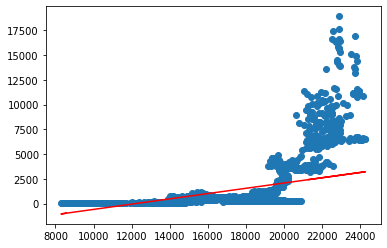

In [430]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 2012-01-04 <= train < 2018-01-4
# 2012-01-04 <= test <= 2019-03-13
split_time = datetime.strptime("2018-01-4", "%Y-%m-%d")
train_x, train_y = X[X.index < split_time] ,Y[Y.index < split_time] 
test_x,  test_y = X[split_time <= X.index] ,Y[split_time <= Y.index] 

model = LinearRegression()
model.fit(train_x, train_y)
print(model.coef_)  #回帰変数の表示
print(model.intercept_)  #回帰直線の切片
print(model.get_params())  #パラメータの取得
print(model.score(test_x,test_y))  #決定係数の表示
plt.scatter(X, Y)
 
# # 回帰直線
plt.plot(X, model.predict(X), color="red")

...

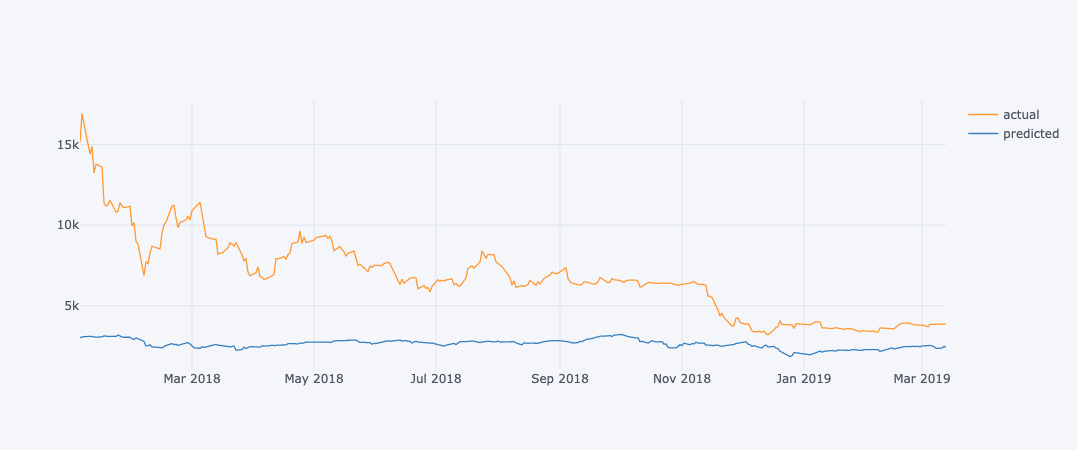

In [431]:
pd.DataFrame({
    "actual": test_y["close_y"],
    "predicted": model.predict(test_x).reshape(1, -1)[0]
}).iplot()

# 結果が芳しくないので差分（どれだけ変化したか）を回帰してみる

In [324]:
diff_XY = XY.diff().dropna()
diff_XY.head()

,open_x,high_x,low_x,close_x,Adj Close,volume_x,open_y,high_y,low_y,close_y,volume_y
Timestamp_UTC,,,,,,,,,,,
2012-01-05,-33.879883,-62.290039,-65.870117,-71.400391,-71.400391,-28300.0,0.79,1.08,0.79,1.08,-12.431431
2012-01-06,-26.679687,-30.179687,-132.500000,-98.360352,-98.360352,23600.0,0.93,0.25,0.28,-0.65,-60.919083
2012-01-10,-65.990235,-38.390625,55.849610,31.910157,31.910157,11000.0,-0.41,0.24,0.24,1.14,28.407233
2012-01-11,17.969727,13.129883,20.850585,25.620117,25.620117,-6100.0,0.90,0.19,0.01,-0.14,43.068954
2012-01-12,-17.860352,-36.889649,-65.700195,-62.290039,-62.290039,-21400.0,-0.19,0.05,0.26,-0.49,-23.057302


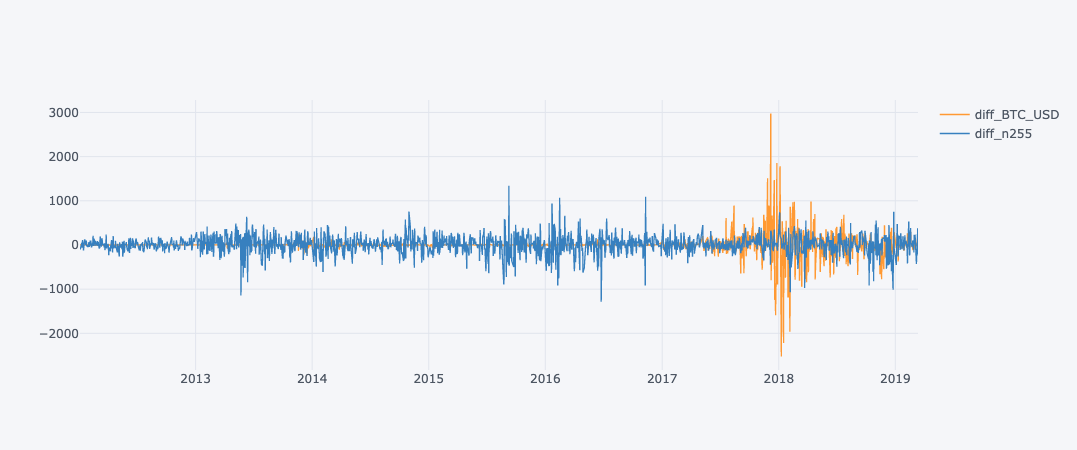

In [344]:
pd.DataFrame({
    "diff_BTC_USD": diff_XY["close_y"],
    "diff_n255": diff_XY["close_x"],
}).iplot()

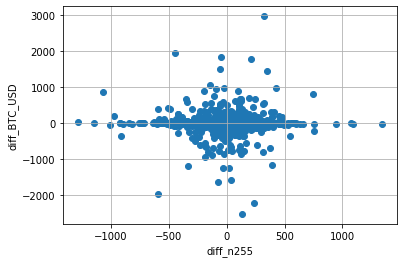

In [435]:
import matplotlib.pyplot as plt
X = diff_XY["close_x"].to_frame()
Y = diff_XY["close_y"].to_frame()
plt.scatter(X, Y)
plt.xlabel("diff_n255")
plt.ylabel("diff_BTC_USD")
plt.grid()

なにもしないより遥かにまし

[[0.00892935]]
[9.6650273]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
-0.012352172223349278


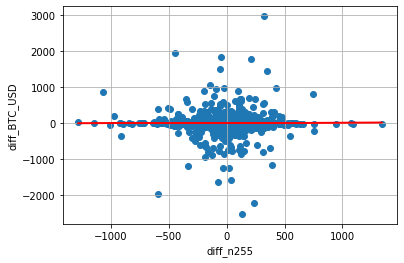

In [436]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 2012-01-04 <= train < 2018-01-4
# 2012-01-04 <= test <= 2019-03-13
split_time = datetime.strptime("2018-01-4", "%Y-%m-%d")
train_x, train_y = X[X.index < split_time] ,Y[Y.index < split_time] 
test_x,  test_y = X[split_time <= X.index] ,Y[split_time <= Y.index] 

model = LinearRegression()
model.fit(train_x, train_y)
print(model.coef_)  #回帰変数の表示
print(model.intercept_)  #回帰直線の切片
print(model.get_params())  #パラメータの取得
print(model.score(test_x,test_y))  #決定係数の表示
plt.scatter(X, Y)
 
# 回帰直線
plt.plot(X, model.predict(X), color="red")
plt.xlabel("diff_n255")
plt.ylabel("diff_BTC_USD")
plt.grid()

はい。

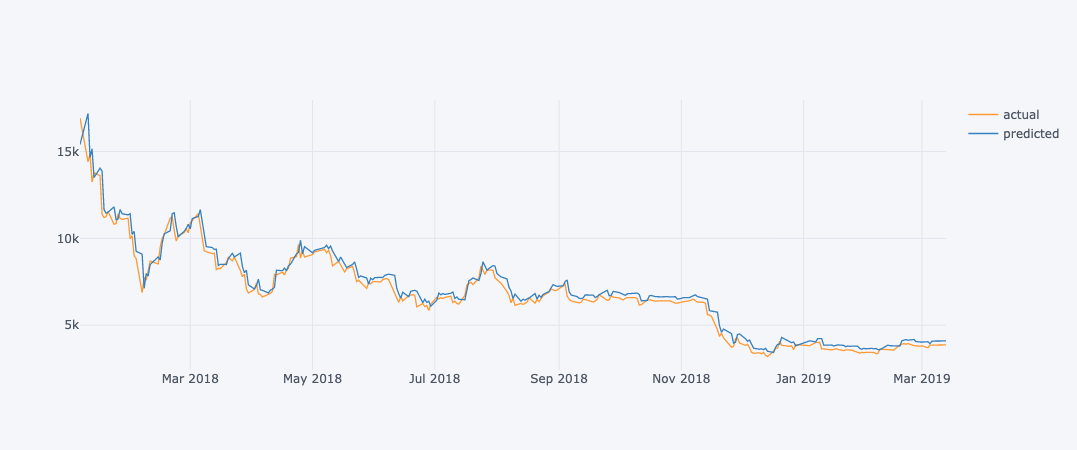

In [441]:
test_x = XY["close_x"].to_frame()[split_time <= XY.index]
predict = XY["close_y"].to_frame()[split_time <= XY.index]
predict["shift"] = predict.shift()
predict["pred_diff"] = model.predict(test_x).reshape(1, -1)[0]
predict = predict.dropna()
predict["predicted"] = predict["shift"] + predict["pred_diff"]
pd.DataFrame({
    "actual": predict["close_y"],
    "predicted": predict["predicted"]
}).iplot()

# 対数差分（だいたい変化率みたいなもの）を回帰してみる

In [422]:
import numpy as np
difflog_XY = np.log(XY) - np.log(XY.shift())
difflog_XY = difflog_XY.dropna()
difflog_XY.head()

/Users/chinomirai/.local/share/virtualenvs/ensemble-ncYZH6ku/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning:

divide by zero encountered in log



,open_x,high_x,low_x,close_x,Adj Close,volume_x,open_y,high_y,low_y,close_y,volume_y
Timestamp_UTC,,,,,,,,,,,
2012-01-05,-0.003971,-0.007285,-0.007736,-0.008376,-0.008376,-0.310584,0.148630,0.177222,0.148630,0.177222,-0.123218
2012-01-06,-0.003138,-0.003549,-0.015745,-0.011655,-0.011655,0.265231,0.150648,0.036905,0.047791,-0.102857,-1.028883
2012-01-10,-0.007804,-0.004533,0.006667,0.003796,0.003796,0.103087,-0.063637,0.034191,0.039221,0.173953,0.608895
2012-01-11,0.002131,0.001553,0.002478,0.003037,0.003037,-0.055850,0.134733,0.026263,0.001601,-0.019803,0.525572
2012-01-12,-0.002118,-0.004368,-0.007828,-0.007401,-0.007401,-0.225029,-0.026971,0.006798,0.040758,-0.072571,-0.246982


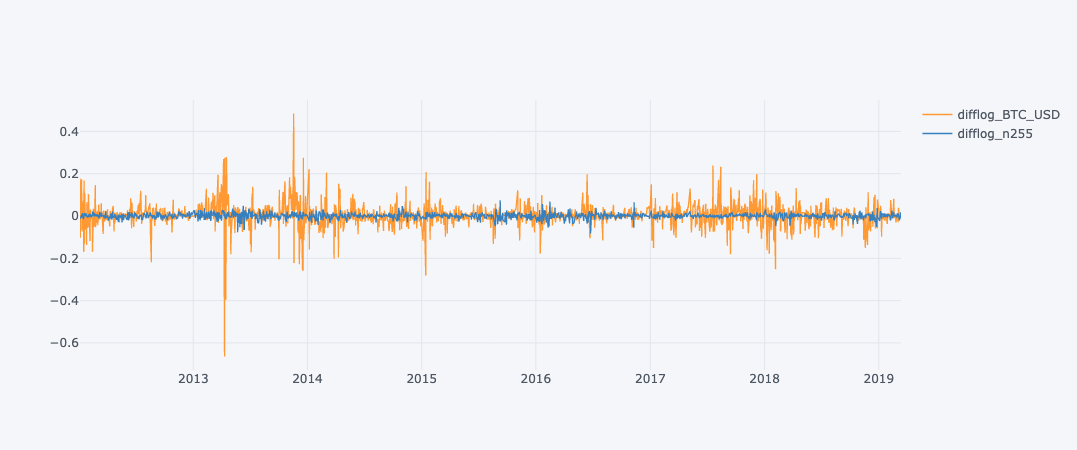

In [360]:
pd.DataFrame({
    "difflog_BTC_USD": difflog_XY["close_y"],
    "difflog_n255": difflog_XY["close_x"],
}).iplot()

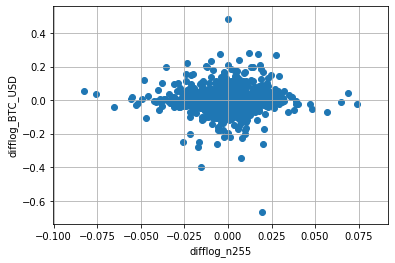

In [451]:
import matplotlib.pyplot as plt
X = difflog_XY["close_x"].to_frame()
Y = difflog_XY["close_y"].to_frame()
plt.scatter(X, Y)
plt.xlabel("difflog_n255")
plt.ylabel("difflog_BTC_USD")
plt.grid()

[[0.00514469]]
[0.00533908]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
-0.04212142123392293


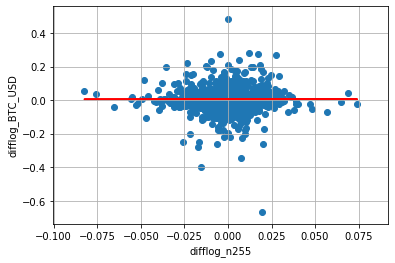

In [469]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 2012-01-04 <= train < 2018-01-4
# 2012-01-04 <= test <= 2019-03-13
split_time = datetime.strptime("2018-01-4", "%Y-%m-%d")
train_x, train_y = X[X.index < split_time] ,Y[Y.index < split_time] 
test_x,  test_y = X[split_time <= X.index] ,Y[split_time <= Y.index] 
model = LinearRegression()
model.fit(train_x, train_y)
print(model.coef_)  #回帰変数の表示
print(model.intercept_)  #回帰直線の切片
print(model.get_params())  #パラメータの取得
print(model.score(test_x,test_y))  #決定係数の表示
plt.scatter(X, Y)
 
# 回帰直線
plt.plot(X, model.predict(X), color="red")
plt.xlabel("difflog_n255")
plt.ylabel("difflog_BTC_USD")
plt.grid()

In [463]:
# len(model.predict(test_x).reshape(1, -1)[0])
len(test_x)

292

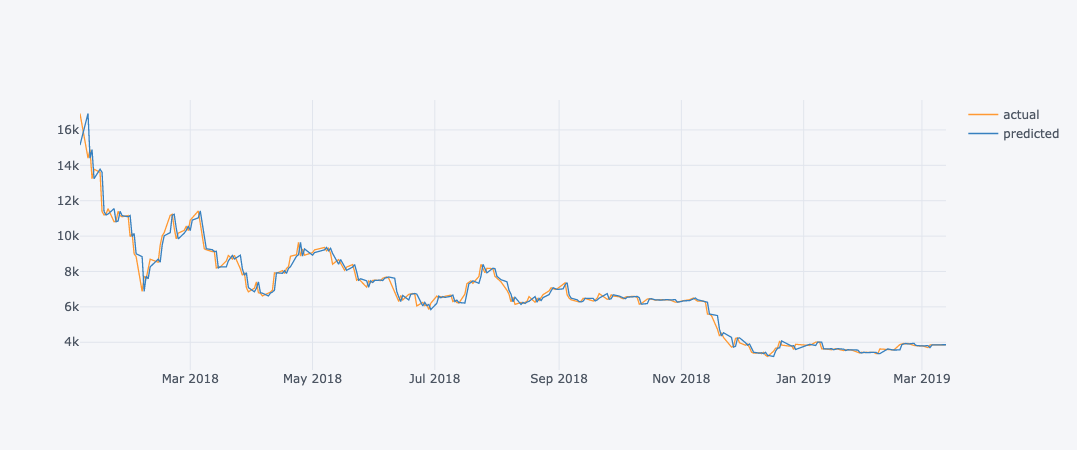

In [474]:
import math

predict = XY["close_y"].to_frame()[split_time <= XY.index]
predict["shift"] = predict.shift()
predict["pred_difflog"] = model.predict(test_x).reshape(1, -1)[0]
predict = predict.dropna()
predict["pred_diff"] = math.e**predict["pred_difflog"]
predict["predicted"] = predict["shift"] + predict["pred_diff"]
pd.DataFrame({
    "actual": predict["close_y"],
    "predicted": predict["predicted"]
}).iplot()

# 気になって調べたこと

- 時系列データの線形補完のやりかた
    - 今回は嘘のデータを混ぜたくないので使わない
    - [pandasで欠損値NaNを前後の値から補間するinterpolate | note.nkmk.me](https://note.nkmk.me/python-pandas-interpolate/)

```python
df.interpolate('time')
```

- OHLCデータは`cufflinks`ってやつ使うと簡単に描写できる
    - Open、High、Low、Closeのあるデータ、主に金融データ
    - [jupyter notebook上で金融データの描画・取得・操作 - Qiita](https://qiita.com/u1and0/items/6bc0dbeed0e20dd89eda)

- OHLCデータのタイムスタンプ単位は`resample`使うと簡単に変更できる

``` python
df.resample('H').agg(how)
```